<a href="https://colab.research.google.com/github/riyyah-90/AI-Internship/blob/main/SGLT2_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SGLT2 Inhibitor Prediction using Machine Learning**



## **Data Loading**

In [14]:
import pandas as pd

# Defining the path to the Excel file
excel_file_path = '/content/Pubchem_data_SGLT2_03112025.xlsx'

# Loading the Excel file into a pandas DataFrame
df = pd.read_excel(excel_file_path)

# Displaying the first few rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())

# Printing the column names and their data types
print("\nDataFrame Info:")
df.info()

First 5 rows of the DataFrame:
   PUBCHEM_RESULT_TAG  PUBCHEM_SID  PUBCHEM_CID  \
0                   1    104153399     46889407   
1                   2    104153400     46889427   
2                   3    104153401     46889428   
3                   4    104153402     46889429   
4                   5    104153403     46889430   

                       PUBCHEM_EXT_DATASOURCE_SMILES PUBCHEM_ACTIVITY_OUTCOME  \
0  C1=CC(=C(C=C1[C@H]2[C@@H]([C@H]([C@@H]([C@H](O...                   Active   
1  CCOC1=NN=C(C=C1)CC2=C(C=CC(=C2)[C@H]3[C@@H]([C...                   Active   
2  CCCOC1=NN=C(C=C1)CC2=C(C=CC(=C2)[C@H]3[C@@H]([...                   Active   
3  CC(C)OC1=NN=C(C=C1)CC2=C(C=CC(=C2)[C@H]3[C@@H]...                   Active   
4  CCCCOC1=NN=C(C=C1)CC2=C(C=CC(=C2)[C@H]3[C@@H](...                   Active   

   PUBCHEM_ACTIVITY_SCORE  PUBCHEM_ACTIVITY_URL  PUBCHEM_ASSAYDATA_COMMENT  \
0                     NaN                   NaN                        NaN   
1                  

## **Column Extraction and Renaming**

In [15]:
columns_to_extract = [
    'PUBCHEM_CID',
    'PUBCHEM_EXT_DATASOURCE_SMILES',
    'PUBCHEM_ACTIVITY_OUTCOME'
]

# Selecting the columns from the original DataFrame
df_extracted = df[columns_to_extract].copy()

# Renaming specified columns
df_extracted.rename(columns={
    'PUBCHEM_CID': 'PubchemID',
    'PUBCHEM_EXT_DATASOURCE_SMILES': 'compound smiles',
    'PUBCHEM_ACTIVITY_OUTCOME': 'activity class'
}, inplace=True)

# Displaying the first few rows of the new DataFrame
print("First 5 rows of the extracted and renamed DataFrame:")
print(df_extracted.head())

# Printing the column names and their data types of the new DataFrame
print("\nDataFrame Info for the extracted and renamed DataFrame:")
df_extracted.info()

First 5 rows of the extracted and renamed DataFrame:
   PubchemID                                    compound smiles activity class
0   46889407  C1=CC(=C(C=C1[C@H]2[C@@H]([C@H]([C@@H]([C@H](O...         Active
1   46889427  CCOC1=NN=C(C=C1)CC2=C(C=CC(=C2)[C@H]3[C@@H]([C...         Active
2   46889428  CCCOC1=NN=C(C=C1)CC2=C(C=CC(=C2)[C@H]3[C@@H]([...         Active
3   46889429  CC(C)OC1=NN=C(C=C1)CC2=C(C=CC(=C2)[C@H]3[C@@H]...         Active
4   46889430  CCCCOC1=NN=C(C=C1)CC2=C(C=CC(=C2)[C@H]3[C@@H](...         Active

DataFrame Info for the extracted and renamed DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PubchemID        97 non-null     int64 
 1   compound smiles  97 non-null     object
 2   activity class   97 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.4+ KB


## **Molecular Fingerprint Computation**

In [7]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
import numpy as np

!pip install rdkit
print("RDKit installed successfully.")

# Function to convert SMILES to RDKit molecule object
def smiles_to_mol(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        return mol
    except:
        return None

# Applying the function to create a new column for RDKit molecule objects
df_extracted['molecule'] = df_extracted['compound smiles'].apply(smiles_to_mol)

# Initializing Morgan Fingerprint Generator
morgan_gen = GetMorganGenerator(radius=2, fpSize=2048) # Using fpSize instead of nBits

# Function to compute Morgan fingerprints (ECFP4) using MorganGenerator
def mol_to_morgan_fingerprint(mol):
    if mol is not None:
        # Using the initialized generator
        fingerprint = morgan_gen.GetFingerprint(mol)
        return list(fingerprint) # Converting to list for easier handling
    return None

# Applying the function to create a new column for fingerprints
df_extracted['morgan_fingerprint'] = df_extracted['molecule'].apply(mol_to_morgan_fingerprint)

# Dropping rows where fingerprint computation failed (mol was None)
df_fingerprints = df_extracted.dropna(subset=['morgan_fingerprint']).copy()

print("\nFirst 5 rows of DataFrame with molecule and fingerprint columns:")
print(df_fingerprints.head())


RDKit installed successfully.

First 5 rows of DataFrame with molecule and fingerprint columns:
   PubchemID                                    compound smiles  \
0   46889407  C1=CC(=C(C=C1[C@H]2[C@@H]([C@H]([C@@H]([C@H](O...   
1   46889427  CCOC1=NN=C(C=C1)CC2=C(C=CC(=C2)[C@H]3[C@@H]([C...   
2   46889428  CCCOC1=NN=C(C=C1)CC2=C(C=CC(=C2)[C@H]3[C@@H]([...   
3   46889429  CC(C)OC1=NN=C(C=C1)CC2=C(C=CC(=C2)[C@H]3[C@@H]...   
4   46889430  CCCCOC1=NN=C(C=C1)CC2=C(C=CC(=C2)[C@H]3[C@@H](...   

  activity class                                          molecule  \
0         Active  <rdkit.Chem.rdchem.Mol object at 0x7ebfda7daff0>   
1         Active  <rdkit.Chem.rdchem.Mol object at 0x7ebfda7db840>   
2         Active  <rdkit.Chem.rdchem.Mol object at 0x7ebfda7d9700>   
3         Active  <rdkit.Chem.rdchem.Mol object at 0x7ebfda7d9230>   
4         Active  <rdkit.Chem.rdchem.Mol object at 0x7ebfda7dbf40>   

                                  morgan_fingerprint  
0  [0, 0, 0, 0, 0, 0, 0, 

## **Merging Fingerprints with IC50**

In [17]:
import pandas as pd

# Selecting the relevant columns from the original df
ic50_data = df[['PUBCHEM_CID', 'IC50']].rename(columns={'PUBCHEM_CID': 'PubchemID'})

# Merging df_fingerprints with ic50_data on PubchemID
df_regression = pd.merge(df_fingerprints[['PubchemID', 'morgan_fingerprint']], ic50_data, on='PubchemID', how='inner')

# Displaying the first few rows of the new DataFrame
print("First 5 rows of df_regression:")
print(df_regression.head())

# Printing the column names and their data types of the new DataFrame
print("\nDataFrame Info for df_regression:")
df_regression.info()

First 5 rows of df_regression:
   PubchemID                                 morgan_fingerprint   IC50
0   46889407  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  202.0
1   46889427  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   43.0
2   46889428  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...   70.8
3   46889429  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  110.0
4   46889430  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...  109.0

DataFrame Info for df_regression:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PubchemID           97 non-null     int64  
 1   morgan_fingerprint  97 non-null     object 
 2   IC50                97 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ KB


## **Data Splitting for Regression**

In [18]:
from sklearn.model_selection import train_test_split
import numpy as np

# Converting 'morgan_fingerprint' column to a NumPy array for features (X)
X_regression = np.array([np.array(fp) for fp in df_regression['morgan_fingerprint']])

# Extracting 'IC50' column as the target variable (y)
y_regression = df_regression['IC50']

# Splitting the data into training and testing sets (80/20 ratio)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42
)

print("Shape of X_regression:", X_regression.shape)
print("Shape of y_regression:", y_regression.shape)
print("Shape of X_train_reg:", X_train_reg.shape)
print("Shape of X_test_reg:", X_test_reg.shape)
print("Shape of y_train_reg:", y_train_reg.shape)
print("Shape of y_test_reg:", y_test_reg.shape)

Shape of X_regression: (97, 2048)
Shape of y_regression: (97,)
Shape of X_train_reg: (77, 2048)
Shape of X_test_reg: (20, 2048)
Shape of y_train_reg: (77,)
Shape of y_test_reg: (20,)


## **Analyzing activity class distribution for model training**



In [9]:
print("Distribbhution of 'activity class':")
print(df_extracted['activity class'].value_counts())

Distribution of 'activity class':
activity class
Active    97
Name: count, dtype: int64


## **Training Regression Models**

In [19]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 1. Random Forest Regressor
print("\n--- Training Random Forest Regressor ---")
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_reg, y_train_reg)
rf_predictions = rf_model.predict(X_test_reg)

rf_r2 = r2_score(y_test_reg, rf_predictions)
rf_mae = mean_absolute_error(y_test_reg, rf_predictions)
rf_mse = mean_squared_error(y_test_reg, rf_predictions)

print(f"Random Forest R-squared: {rf_r2:.4f}")
print(f"Random Forest MAE: {rf_mae:.4f}")
print(f"Random Forest MSE: {rf_mse:.4f}")

# 2. Gradient Boosting Regressor
print("\n--- Training Gradient Boosting Regressor ---")
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train_reg, y_train_reg)
gbr_predictions = gbr_model.predict(X_test_reg)

gbr_r2 = r2_score(y_test_reg, gbr_predictions)
gbr_mae = mean_absolute_error(y_test_reg, gbr_predictions)
gbr_mse = mean_squared_error(y_test_reg, gbr_predictions)

print(f"Gradient Boosting R-squared: {gbr_r2:.4f}")
print(f"Gradient Boosting MAE: {gbr_mae:.4f}")
print(f"Gradient Boosting MSE: {gbr_mse:.4f}")


--- Training Random Forest Regressor ---
Random Forest R-squared: 0.2297
Random Forest MAE: 241.5971
Random Forest MSE: 185027.3836

--- Training Gradient Boosting Regressor ---
Gradient Boosting R-squared: 0.2898
Gradient Boosting MAE: 223.1577
Gradient Boosting MSE: 170575.1723


## **Visualizing Results**

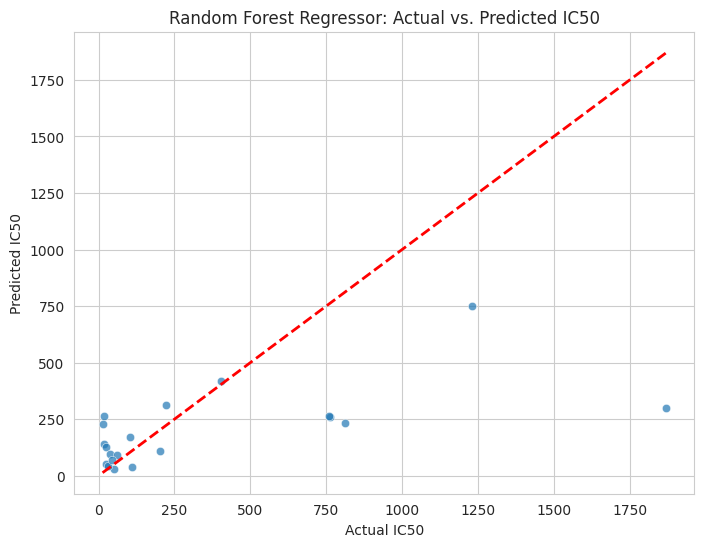

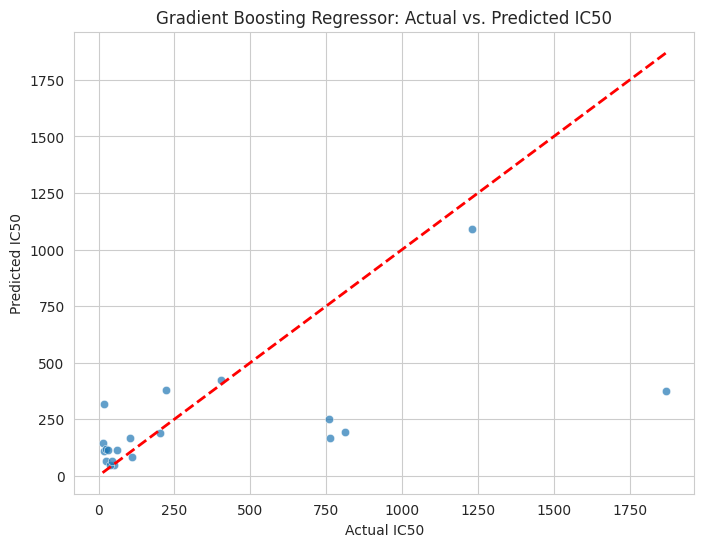

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting plot style
sns.set_style("whitegrid")

# 1. Random Forest Regressor: Actual vs. Predicted IC50
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_reg, y=rf_predictions, alpha=0.7)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', linestyle='--', lw=2)
plt.title('Random Forest Regressor: Actual vs. Predicted IC50')
plt.xlabel('Actual IC50')
plt.ylabel('Predicted IC50')
plt.show()

# 2. Gradient Boosting Regressor: Actual vs. Predicted IC50
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_reg, y=gbr_predictions, alpha=0.7)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', linestyle='--', lw=2)
plt.title('Gradient Boosting Regressor: Actual vs. Predicted IC50')
plt.xlabel('Actual IC50')
plt.ylabel('Predicted IC50')
plt.show()